## Course Introduction

**Course:** Big Data And Analytics
**Years:** 2023-2024
**University:** Polytechnic University of Bari, Italy
**Instructor:** Dr. Yashar Deldjoo
**Topic:** Gradient Descent

Welcome to the 'Big Data And Analytics' course, offered by the Polytechnic University of Bari for the academic years 2023-2024. This course is designed to equip students with the fundamental concepts and tools necessary to understand and work with large and complex data sets.

We will guide you through the intricacies of data analytics, from theoretical foundations to practical applications. This notebook focuses on the implementation of Gradient Descent, a cornerstone algorithm for optimizing complex models.

Feel free to reach out with questions and engage actively in your learning journey. Let's dive into the world of big data together!

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/yasdel/Big_Data_And_Analytics/blob/BRANCH/L1 - Gradient_Descent_BDA'23.ipynb

## Goals
In this lab you will:
- you will implement and explore the `cost` function for linear regression with one variable.
- you will also implement and explore the `gradient` function for linear regression with one variable.
- then you will combine the above two functions to create your own first `gradient-descent` function
- you also have the chance to try and test several visualization techniques  

## Tools
In this lab we will make use of:
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- local plotting routines in the lab_utils_uni.py file in the local directory

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Problem Statement

You would like a model which can predict housing prices given the size of the house.  
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.


| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |


In [ ]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 600.0])           #(price in 1000s of dollars)

print(x_train)
print(y_train)

print('\n')
x = [1.0, 2.0]
y = [300.0, 500.0]
print(x)
print(y)

print(type(x_train))
print(type(x))

[1. 2.]
[300. 600.]


[1.0, 2.0]
[300.0, 500.0]
<class 'numpy.ndarray'>
<class 'list'>


## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.


The code below calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [ ]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

In [ ]:
total_cost = compute_cost(x_train, y_train, w = 300, b=0)
print(f'total_cost = {total_cost}')

total_cost = 0.0


In [ ]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [ ]:
import numpy as np

def test_compute_gradient():
    # Test 1
    x = np.array([1, 2, 3])
    y = np.array([2, 4, 6])
    w, b = 2, 0
    expected_dw, expected_db = 0.0, 0.0 # Given w and b, this is a perfect fit, so gradient should be zero.
    computed_dw, computed_db = compute_gradient(x, y, w, b)
    assert np.isclose(computed_dw, expected_dw), f"Test 1 failed for dj_dw: Expected {expected_dw}, Got {computed_dw}"
    assert np.isclose(computed_db, expected_db), f"Test 1 failed for dj_db: Expected {expected_db}, Got {computed_db}"
    print("Test 1 passed")

    # Test 2
    x = np.array([1, 2, 3])
    y = np.array([3, 5, 7])
    w, b = 2, 1
    expected_dw, expected_db = 0, 0 # Given w=0, b=0, the gradient should be the average deviation
    computed_dw, computed_db = compute_gradient(x, y, w, b)
    assert np.isclose(computed_dw, expected_dw), f"Test 2 failed for dj_dw: Expected {expected_dw}, Got {computed_dw}"
    assert np.isclose(computed_db, expected_db), f"Test 2 failed for dj_db: Expected {expected_db}, Got {computed_db}"
    print("Test 2 passed")

    # You can add more test cases if necessary.

test_compute_gradient()


Test 1 passed
Test 2 passed


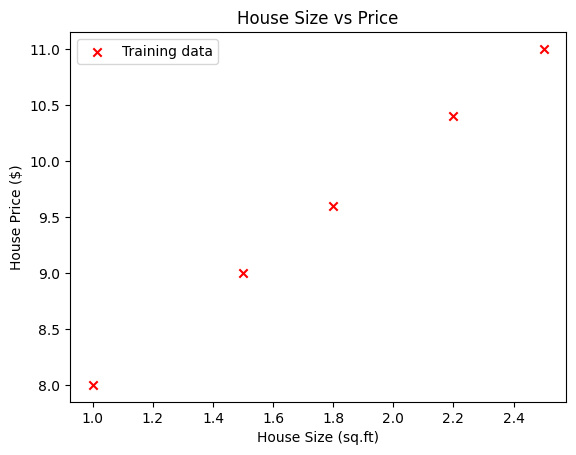

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Data Collection
x = np.array([1, 1.5, 1.8, 2.2, 2.5])
y = 2*x +6
#y = np.array([2, 2.8, 3.3, 4.2, 4.6])

# Step 2: Data Visualization
plt.scatter(x, y, color='red', marker='x', label='Training data')
plt.xlabel('House Size (sq.ft)')
plt.ylabel('House Price ($)')
plt.title('House Size vs Price')
plt.legend()
plt.show()

def gradient_descent(x, y, w, b, learning_rate, num_iterations):
    """
    Performs gradient descent optimization to adjust the parameters w, b

    Args:
        x, y (ndarray): Data and target values
        w, b (scalar)  : Initial values of parameters
        learning_rate  : Learning rate for gradient descent
        num_iterations : Number of iterations

    Returns:
        w, b (scalar)  : Adjusted values of parameters
        cost_history   : Cost after each iteration
    """
    cost_history = []

    for i in range(num_iterations):
        # Compute gradient
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        # Update parameters
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db

        # Compute cost and store in history
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)

    return w, b, cost_history

9.399999999999919


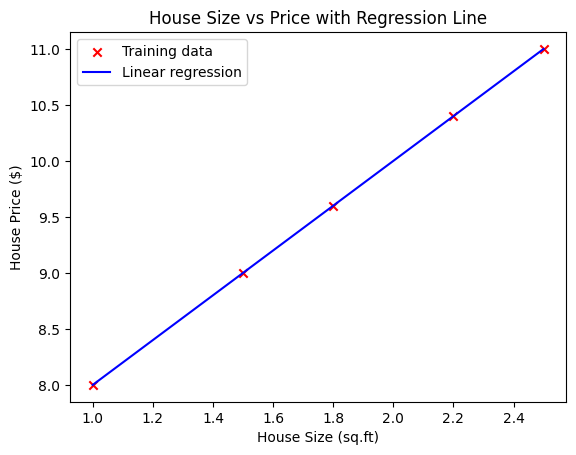

MSE: 3.940454884887581e-26


In [ ]:
# Steps 3 & 4: Implementing Linear Regression & Training the Model
w, b = 0, 0 # starting with some initial values
learning_rate = 0.01
num_iterations = 100000
w, b, cost_history = gradient_descent(x, y, w, b, learning_rate, num_iterations)

# Step 5: Prediction
def predict(x, w, b):
    return w * x + b

# Sample prediction
print(predict(1.7, w, b)) # Predicting for 1700 sq.ft

# Step 6: Visualization of the Regression Line
plt.scatter(x, y, color='red', marker='x', label='Training data')
plt.plot(x, predict(x, w, b), color='blue', label='Linear regression')
plt.xlabel('House Size (sq.ft)')
plt.ylabel('House Price ($)')
plt.title('House Size vs Price with Regression Line')
plt.legend()
plt.show()

# Step 7: Evaluation
mse = 2 * cost_history[-1] # last cost value is our mean squared error
print(f'MSE: {mse}')


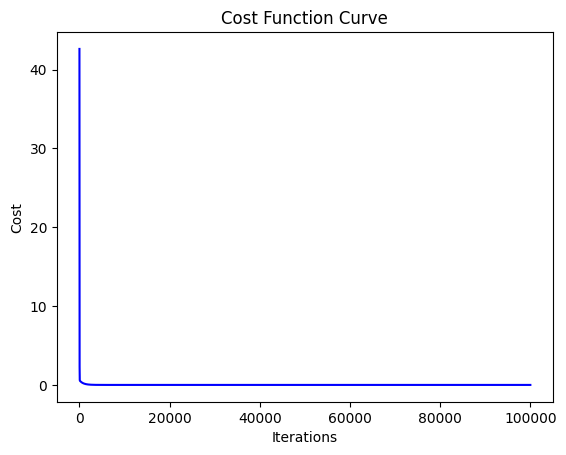

Final w (weight): 2.000000000000368
Final b (bias): 5.999999999999293


In [ ]:
# Plotting the cost history
plt.plot(range(num_iterations), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Curve')
plt.show()

# Print the final w and b values
print(f"Final w (weight): {w}")
print(f"Final b (bias): {b}")
